# HuggingFace Pipelines

**Hugging Face’s pipeline** is like an all-in-one tool that makes using powerful language models simple and beginner-friendly. Imagine if you had a toolbox that could do all sorts of different tasks with just a couple of clicks—Hugging Face pipelines are exactly that for AI and natural language processing (NLP). They allow you to easily apply tasks like text generation, sentiment analysis, translation, and more, without having to worry about the complex code under the hood.

**What are Pipelines?**
- Pipelines are a high-level abstraction provided by Hugging Face to help you quickly use models for common NLP tasks.
- It allows you to use complex models without diving deep into the details of loading, preparing, and running the model.
- Pipelines take care of all the “heavy lifting” for you, such as text preprocessing, passing data to the model, and interpreting the output.

Benefits of Using Pipelines:
- Beginner-Friendly: No need to understand the intricacies of deep learning or neural networks—pipelines handle everything for you.
- Quick Start: Pipelines let you accomplish complex tasks in just a few lines of code.
- Flexible: It supports different tasks like sentiment analysis, text generation, translation, and more—just by changing one argument.

## Installation

First, install HuggingFace Transformers and Datasets

In [1]:
# Transformers installation
! pip install transformers datasets
! pip install torch
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.7 MB/s eta 0:00:00



Note that a lot of today's source code comes from HF's documentation and tutorials, [course](https://huggingface.co/course/chapter1/1)

Hugging Face Transformers and Datasets are tools that help developers and data scientists work with natural language processing (NLP) models and data more easily.

**Transformers Library**

Hugging Face Transformers is an open-source library that provides access to a variety of pre-trained deep learning models, mostly focused on NLP tasks like text generation, sentiment analysis, translation, and more. These models are called transformers because they use the transformer architecture, which is very efficient for understanding and processing language.

**Datasets Library**

Hugging Face Datasets is a library that provides easy access to a large number of datasets used for training and evaluating machine learning models, especially in NLP. It’s designed to work seamlessly with the transformers library.

**AutoClass**

AutoClass in Hugging Face refers to a set of classes that help you easily load pre-trained models or components without needing to manually specify the exact type. The AutoClass feature is a part of the Transformers library and is designed to make using models as simple and automatic as possible.

Get up and running with 🤗 Transformers! Whether you're a developer or an everyday user, this quick tour will help you get started and show you how to use the [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) for inference, load a pretrained model and preprocessor with an [AutoClass](https://huggingface.co/docs/transformers/main/en/./model_doc/auto), and quickly train a model with PyTorch.

In many cases, the architecture you want to use can be guessed from the name or the path of the pretrained model you are supplying to the from_pretrained() method. AutoClasses are here to do this job for you so that you automatically retrieve the relevant model given the name/path to the pretrained weights/config/vocabulary.

Instantiating one of AutoConfig, AutoModel, and AutoTokenizer will directly create a class of the relevant architecture.

Before you begin, make sure you have all the necessary libraries installed:

```bash
!pip install transformers datasets
```

You'll also need to install your preferred machine learning framework:

```bash
pip install torch
```

## Pipeline

The [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) is the easiest and fastest way to use a pretrained model for inference. You can use the [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) out-of-the-box for many tasks across different modalities, some of which are shown in the table below:

<Tip>

For a complete list of available tasks, check out the [pipeline API reference](https://huggingface.co/docs/transformers/main/en/./main_classes/pipelines).

</Tip>

| **Task**                     | **Description**                                                                                              | **Modality**    | **Pipeline identifier**                       |
|------------------------------|--------------------------------------------------------------------------------------------------------------|-----------------|-----------------------------------------------|
| Text classification          | assign a label to a given sequence of text                                                                   | NLP             | pipeline(task=“sentiment-analysis”)           |
| Text generation              | generate text given a prompt                                                                                 | NLP             | pipeline(task=“text-generation”)              |
| Summarization                | generate a summary of a sequence of text or document                                                         | NLP             | pipeline(task=“summarization”)                |
| Image classification         | assign a label to an image                                                                                   | Computer vision | pipeline(task=“image-classification”)         |
| Image segmentation           | assign a label to each individual pixel of an image (supports semantic, panoptic, and instance segmentation) | Computer vision | pipeline(task=“image-segmentation”)           |
| Object detection             | predict the bounding boxes and classes of objects in an image                                                | Computer vision | pipeline(task=“object-detection”)             |
| Audio classification         | assign a label to some audio data                                                                            | Audio           | pipeline(task=“audio-classification”)         |
| Automatic speech recognition | transcribe speech into text                                                                                  | Audio           | pipeline(task=“automatic-speech-recognition”) |
| Visual question answering    | answer a question about the image, given an image and a question                                             | Multimodal      | pipeline(task=“vqa”)                          |
| Document question answering  | answer a question about a document, given an image and a question                                            | Multimodal      | pipeline(task="document-question-answering")  |
| Image captioning             | generate a caption for a given image                                                                         | Multimodal      | pipeline(task="image-to-text")                |

Start by creating an instance of [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) and specifying a task you want to use it for. In this guide, you'll use the [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) for sentiment analysis as an example:

In [3]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

# no model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


The [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) downloads and caches a default [pretrained model](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) and tokenizer for sentiment analysis.

In this case, it loads distilbert: https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english , which is a version of DistilBERT that has been fine-tuned for the SST-2 dataset (Stanford Sentiment Treebank).

This model is well-suited for binary sentiment classification (e.g., positive or negative sentiment).

Now you can use the `classifier` on your target text:

In [4]:
classifier("I'm feeling so great today, and I'm looking forward to learning more about AI!")

[{'label': 'POSITIVE', 'score': 0.9998594522476196}]

The output is a dictionary that includes:
- A label ("POSITIVE" or "NEGATIVE").
- A score representing the model's confidence in that label. The "score" value shows the confidence level of the model's prediction, which is approximately 0.99, meaning the model is 99% confident that the input text expresses a very positive sentiment.

**Compared to our code for sentiment analysis last week, what are your thoughts on the ease of use and accuracy of huggingface's pipeline implementation?**

If you have more than one input, pass your inputs as a list to the [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) to return a list of dictionaries:

In [5]:
results = classifier(["We are so excited for Day 2 of the AIR bootcamp.", "We hope you don't hate it."])
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: POSITIVE, with score: 0.9989
label: NEGATIVE, with score: 0.5309


The pipeline can be applied to multi-modal applications as ewll.

- AutoImageProcessor: Automatically loads the correct processor to prepare images for input.
- AutoModelForImageClassification: Loads a pre-trained image classification model.
- PIL (Python Imaging Library): Used to handle image loading and manipulation.
- google.colab.files: Used to upload files directly in Google Colab, allowing users to upload an image for classification

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Saving roberto-nickson-N_V13fMHtiE-unsplash.jpg to roberto-nickson-N_V13fMHtiE-unsplash.jpg


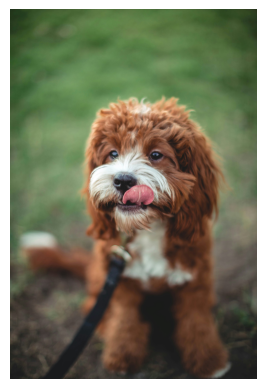

[{'label': 'Tibetan terrier, chrysanthemum dog', 'score': 0.19624575972557068}, {'label': 'miniature poodle', 'score': 0.1598590463399887}, {'label': 'Sussex spaniel', 'score': 0.0643693059682846}, {'label': 'toy poodle', 'score': 0.055169228464365005}, {'label': 'Blenheim spaniel', 'score': 0.054147761315107346}]


In [7]:
from transformers import pipeline, AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt



# Load the image processor and model
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

# Create the image classification pipeline
image_classifier = pipeline("image-classification", model=model, image_processor=image_processor)


# Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the path of the uploaded image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()


# Perform image classification
results = image_classifier(image)

# Print the results
print(results)

The model we're using, google/vit-base-patch16-224, is a general-purpose image classification model trained on a large dataset called ImageNet. This dataset contains a wide variety of images across 1000 different categories.

- Objects: cars, bicycles, airplanes, chairs, tables, etc.
- Animals: cats, dogs, birds, fish, horses, etc.
- Plants: trees, flowers, grass, etc.
- Scenes: beaches, mountains, forests, cities, etc.
- Food: fruits, vegetables, desserts, etc.
- People: faces, portraits, etc.

### Use another model and tokenizer in the pipeline

The [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) can accommodate any model from the [Hub](https://huggingface.co/models), making it easy to adapt the [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) for other use-cases. For example, if you'd like a model capable of handling French text, use the tags on the Hub to filter for an appropriate model. The top filtered result returns a multilingual [BERT model](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment) finetuned for sentiment analysis you can use for French text:

In [8]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"

Use [AutoModelForSequenceClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForSequenceClassification) and [AutoTokenizer](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoTokenizer) to load the pretrained model and it's associated tokenizer (more on an `AutoClass` in the next section)

- [AutoModelForSequenceClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForSequenceClassification) Instantiates one of the model classes of the library (with a sequence classification head) from a configuration.

Note: Loading a model from its configuration file does not load the model weights. It only affects the model’s configuration. Use from_pretrained() to load the model weights.

- AutoTokenizer: Think of this as a tool that breaks down your text into smaller units called tokens. These tokens could be words, parts of words, or even punctuation marks. It then assigns a unique number to each token, creating a numerical representation of your text. This process is crucial for allowing computers to work with language data.

- AutoModelForSequenceClassification: This is the actual model that analyzes the text. It's designed to take the sequence of numbers generated by the AutoTokenizer and assign it to a category. For instance, if you're working on sentiment analysis, this model could classify a sentence as "positive," "negative," or "neutral" based on the tokens and their numerical representation.

In [9]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Specify the model and tokenizer in the [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline), and now you can apply the `classifier` on French text:

In [10]:
classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
classifier("Nous sommes très heureux de vous présenter la bibliothèque 🤗 Transformers.")

[{'label': '5 stars', 'score': 0.7272651791572571}]

**Features of this Model**
- Multilingual: This BERT model is capable of handling multiple languages. This means it can be used for sentiment analysis in several languages without additional training.
- Sentiment Analysis: The model is fine-tuned to classify input text into five categories:
  - 1 star: Very negative sentiment.
  - 2 stars: Negative sentiment.
  - 3 stars: Neutral sentiment.
  - 4 stars: Positive sentiment.
  - 5 stars: Very positive sentiment

If you can't find a model for your use-case, you'll need to finetune a pretrained model on your data, which we'll see in our next notebook today :)

## AutoClass

Under the hood, the [AutoModelForSequenceClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForSequenceClassification) and [AutoTokenizer](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoTokenizer) classes work together to power the [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline) you used above. An [AutoClass](https://huggingface.co/docs/transformers/main/en/./model_doc/auto) is a shortcut that automatically retrieves the architecture of a pretrained model from its name or path. You only need to select the appropriate `AutoClass` for your task and it's associated preprocessing class.

Let's return to the example from the previous section and see how you can use the `AutoClass` to replicate the results of the [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline).

### AutoTokenizer

- Loads the correct tokenizer based on the model.

A tokenizer is responsible for preprocessing text into an array of numbers as inputs to a model. There are multiple rules that govern the tokenization process, including how to split a word and at what level words should be split (learn more about tokenization in the [tokenizer summary](https://huggingface.co/docs/transformers/main/en/./tokenizer_summary)). The most important thing to remember is you need to instantiate a tokenizer with the same model name to ensure you're using the same tokenization rules a model was pretrained with.

Load a tokenizer with [AutoTokenizer](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoTokenizer):

In [12]:
from transformers import AutoTokenizer

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)

Pass your text to the tokenizer:

In [13]:
encoding = tokenizer("We are very happy to show you the 🤗 Transformers library.")
print(encoding)

{'input_ids': [101, 11312, 10320, 12495, 19308, 10114, 11391, 10855, 10103, 100, 58263, 13299, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


The tokenizer returns a dictionary containing:

* [input_ids](https://huggingface.co/docs/transformers/main/en/./glossary#input-ids): numerical representations of your tokens.;
-- This represents the numerical representation of the input tokens.
Each token (word or subword) from the text is converted into a unique numerical ID. This allows the model to process the sequence of words.
For example, "I love transformers" might be converted to [101, 1045, 2293, 19081, 102].
* [attention_mask](https://huggingface.co/docs/transformers/main/en/.glossary#attention-mask): indicates which tokens should be attended to.
-- This is a binary mask that indicates which tokens the model should pay attention to and which should be ignored.
Tokens that are part of the actual input text are marked with 1, while padding tokens (used to make input sequences the same length) are marked with 0.
The attention mask helps the model focus only on the relevant parts of the input sequence, which is especially useful for ensuring that padding tokens don't affect the model's performance.



A tokenizer can also accept a list of inputs, and pad and truncate the text to return a batch with uniform length:

In [15]:
pt_batch = tokenizer(
    ["So excited for day 2 of the bootcamp!", "We hope you are looking forward to it."],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt",
)

- tokenizer(...):
  - This is a call to the tokenizer to convert the given input texts into token IDs and other components that can be fed into a model.
  - The tokenizer is used to break down text into tokens (typically words or subwords), convert them into numerical IDs, and prepare them for the model.

- Input Texts (["So excited for day 2 of the bootcamp!", "We hope you are looking forward to it."]):
  - The tokenizer is provided with two text strings as input.
  - These are two separate sentences, which will be processed together in a batch.

- padding=True:
  - This instructs the tokenizer to pad the sequences so that all of them are of the same length.
  - Padding is necessary when handling multiple sentences of different lengths, as models require inputs to be of the same size.
  - The shorter sequence(s) will be padded with zeros ([PAD] tokens) to match the longest one in the batch.

- truncation=True:
  - If the input text exceeds a certain length (in this case, the max_length parameter), truncation will cut the sequence to keep only the maximum allowed tokens.
  - This prevents sequences from being too long for the model's capacity, which would cause an error.

- max_length=512:
  - This sets the maximum number of tokens that each sequence can contain.
If a sentence exceeds 512 tokens, it will be truncated to ensure it stays within the max_length limit. The value 512 is a common limit for many transformer models (like BERT), but different models may have different limits.

- return_tensors="pt":
  - This specifies the format in which the tokenizer should return the output. "pt" stands for PyTorch.
  - The output will be returned as a PyTorch tensor, which is necessary for using the data with PyTorch-based models.
  - Alternatively, "tf" can be used for TensorFlow, or "np" for NumPy arrays.-

<Tip>

Check out the [preprocess](https://huggingface.co/docs/transformers/main/en/./preprocessing) tutorial for more details about tokenization, and how to use an [AutoImageProcessor](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoImageProcessor), [AutoFeatureExtractor](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoFeatureExtractor) and [AutoProcessor](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoProcessor) to preprocess image, audio, and multimodal inputs.

</Tip>

### AutoModel

🤗 Transformers provides a simple and unified way to load pretrained instances. This means you can load an [AutoModel](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModel) like you would load an [AutoTokenizer](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoTokenizer). The only difference is selecting the correct [AutoModel](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModel) for the task. For text (or sequence) classification, you should load [AutoModelForSequenceClassification](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModelForSequenceClassification):

In [16]:
from transformers import AutoModelForSequenceClassification

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
pt_model = AutoModelForSequenceClassification.from_pretrained(model_name)

<Tip>

See the [task summary](https://huggingface.co/docs/transformers/main/en/./task_summary) for tasks supported by an [AutoModel](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoModel) class.

</Tip>

Now pass your preprocessed batch of inputs directly to the model. You just have to unpack the dictionary by adding `**`:

In [18]:
pt_outputs = pt_model(**pt_batch)

# pt_outputs = pt_model(input_ids=pt_batch['input_ids'], attention_mask=pt_batch['attention_mask'])


### Save a model

Once your model is fine-tuned, you can save it with its tokenizer using [PreTrainedModel.save_pretrained()](https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.PreTrainedModel.save_pretrained):

In [20]:
pt_save_directory = "./pt_save_pretrained"
tokenizer.save_pretrained(pt_save_directory)
pt_model.save_pretrained(pt_save_directory)

When you are ready to use the model again, reload it with [PreTrainedModel.from_pretrained()](https://huggingface.co/docs/transformers/main/en/main_classes/model#transformers.PreTrainedModel.from_pretrained):

In [21]:
pt_model = AutoModelForSequenceClassification.from_pretrained("./pt_save_pretrained")

One particularly cool 🤗 Transformers feature is the ability to save a model and reload it as either a PyTorch or TensorFlow model. The `from_pt` or `from_tf` parameter can convert the model from one framework to the other:

In [22]:
from transformers import AutoModel

tokenizer = AutoTokenizer.from_pretrained("pt_save_pretrained")
pt_model = AutoModelForSequenceClassification.from_pretrained("pt_save_pretrained", from_tf=True)

All TF 2.0 model weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


## Custom model builds

You can modify the model's configuration class to change how a model is built. The configuration specifies a model's attributes, such as the number of hidden layers or attention heads. You start from scratch when you initialize a model from a custom configuration class. The model attributes are randomly initialized, and you'll need to train the model before you can use it to get meaningful results.

Start by importing [AutoConfig](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoConfig), and then load the pretrained model you want to modify. Within [AutoConfig.from_pretrained()](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoConfig.from_pretrained), you can specify the attribute you want to change, such as the number of attention heads:

In [23]:
from transformers import AutoConfig

my_config = AutoConfig.from_pretrained("distilbert-base-uncased", n_heads=12)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Create a model from your custom configuration with [AutoModel.from_config()](https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.FlaxAutoModelForVision2Seq.from_config):

In [24]:
from transformers import AutoModel

my_model = AutoModel.from_config(my_config)

In [25]:
my_model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

Take a look at the [Create a custom architecture](https://huggingface.co/docs/transformers/main/en/./create_a_model) guide for more information about building custom configurations.